<a href="https://colab.research.google.com/github/falakjaiin/cap-comp215/blob/2024.01/lessons/week05-CA-1D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cellular Automata
Our week 5 workbook, available on Github from the powderflask/cap-comp215 repository.

As usual, the first code block just imports the modules we will use.

In [1]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from timeit import timeit

# Configure matplotlib's animation library to work in the browser.
matplotlib.rc('animation', html='jshtml')

## Zero-dimensional CA
Here's a simple implementation of the 0-D CA mentioned in the book.
This CA is a single scalar value and a rule for computing its state-transition in the next time step.
The rule we use  is:  $ state[t+1] = (state[t] + 1)\mod2 $
where $t$ represents the "time step" of the simulation.  Notice this is a [recurrence relation](https://en.wikipedia.org/wiki/Recurrence_relation)

In [2]:
ca_state = 0  # initial state for our zero-D CA
def ca_0D_rule(state):
    """ The "state transition rule" for computing the next CA state in next timestep."""
    return (state + 1) % 2

# Run a simulation of the CA with given rule
n_steps = 10                              # number of time steps to run the CA simulation
ca_timesteps = [ca_state,]                # define a list to hold the CA state for each time step
for t in range(n_steps):
    ca_state = ca_0D_rule(ca_state)
    ca_timesteps.append(ca_state)
ca_timesteps

[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]

What is this CA's behaviour?   **It "blinks"!**

Notice how we are using a 1-D list to capture the state of the CA over time, making it easy to visualize the behaviour arising from its rule.
Thus, `ca_timesteps[t]` records the state of the CA at each time step `t`.

## One-dimensional CA
The state of a 1-D CA is represented as a vector (a list of numbers).  Each value in the CA is called a **cell**.
As in the 0-D case, a rule defines the CA behaviour over time:  $ ca[t+1] = f( ca[t] ) $

**Remember**: a 1-D CA is a **vector** representing the **state** of the CA, and a **rule** defining the **state transition** to the next timestep.  It is not more complicated than this.

In the following example, the rule is:  sum up immediate neighbours and take mod 2

In [29]:
ca_state = [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]   # represent state for a 1-D CA with a list of 0 / 1 values

def ca_1D_rule(neighbours):
    """ The "state transition rule" for computing the next CA state for one cell in the neighbourhood. """
    return sum(neighbours) % 2

def ca_1D_step(state):
    """ Return next state for given CA state after one time step """
    next = [0]*len(state)              # an "empty" list to hold the next state
    for i in range(1, len(state)-1):
        neighbours = state[i-1:i+2]    # a `slice` operation - review this if it seems unfamiliar!
        next[i] = ca_1D_rule(neighbours)
    return next

# Run a simulation of the CA with given rule
def ca_1D_simulation(n_cells=11, n_steps=5):
    """ Run an `n_step` CA simulation starting with a single 1 in middle cell of a `n_cells` sized vector  """
    ca_state = [0]*(n_cells//2) + [1, ] + [0]*(n_cells//2)
    ca_timesteps = [ca_state,]     # Define a "stack" of vectors to hold the CA state for each time step
    for t in range(n_steps):
        ca_state = ca_1D_step(ca_state)
        ca_timesteps.append(ca_state)
    return ca_timesteps  # return an array of vectors - one CA state vector for each timestep
ca_1D_simulation(n_cells = 15 , n_steps = 5)

[[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0]]

### Timing Tests
Test efficiency of our simple implementation as we scale up size of CA

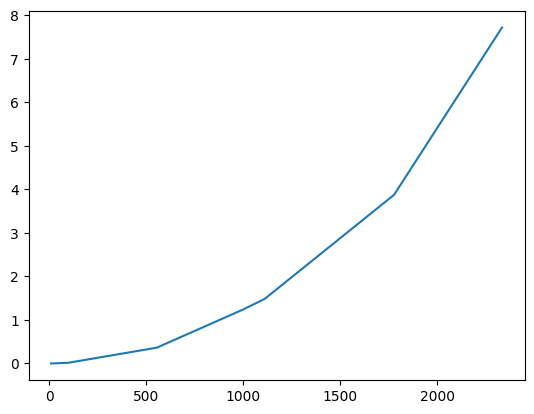

In [30]:
# CA "size" defines both the number of cells and time steps for the CA
ca_sizes = (11, 99, 555, 999,  1111, 1777, 2333, )

timings = [
    timeit(lambda: ca_1D_simulation(n_cells=size, n_steps=size),  number=3)
        for size in ca_sizes
]
plt.plot(ca_sizes, timings)

#### Question:
What is the *Big-O* time complexity of the `ca_1D_simulation` algorithm?

## Visualizing the CA simulation
A table of numbers makes it hard to visualize the CA behaviour.
`pyplot` to the rescue!
An image is just a rectangular grid of numbers, so any 2D matrix can be visualized as an image...

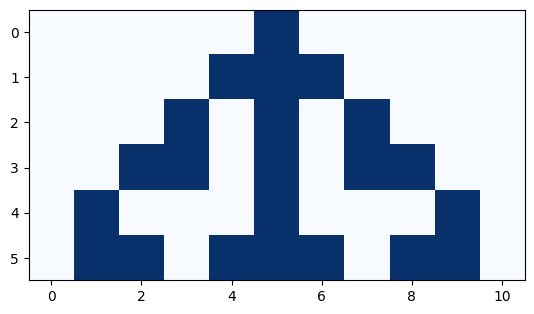

In [5]:
plt.imshow(ca_1D_simulation(), cmap='Blues', interpolation='none')

As usual, let's create a small, configurable abstraction to hide some of the details...

In [6]:
def plot_ca(array, axes=None, title='', cmap='Blues', **options):
    """
    Plot the 2D array as an image on the given axes  1's will be dark blue, 0's will be light blue.

    :param axes: the axes to plot on, or None to use the `plt.gca()` (current axes)
    :param options: keyword arguments passed directly to `plt.imshow()`
           see https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.imshow.html
    """
    axes = axes or plt.gca()  # If not axes are provided, draw on current axes
    axes.set(
        title=title,
        ylabel='Time Steps',
    )
    # Turn off axes labels and tick marks
    axes.tick_params(axis='x', which='both', bottom=False, labelbottom=False)
    # Defaults for displaying a "matrix" with hard-pixel boundaries and (0,0) at top-left
    options = {**dict(interpolation='nearest', origin='upper'), **options}
    axes.imshow(array, cmap=cmap, **options)

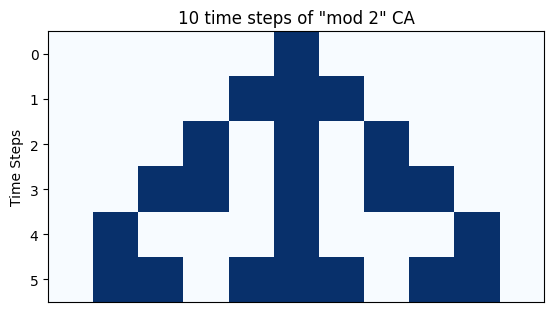

In [7]:
plot_ca(ca_1D_simulation(), title=f'{n_steps} time steps of "mod 2" CA')

# Exploring the Elementary Cellular Automata Rule-Space

For all **Elementary CA**, the rule has the form:   $ ca[i]_{t+1} = f(ca[i-1..i+1]_t) $
In words: the next state for cell i is a function of immediate 3-cell neighbourhood.

*What are all the possible computations that can be done within this limited universe?*

Stephen Wolfram coined the term "[Ruliad](https://mathworld.wolfram.com/Ruliad.html)" to mean "everything that is computationally possible" within a defined universe.  In [A New Kind of Science](https://www.wolframscience.com/nks/), he explores the *Ruliad* (or rule-space) for Elementary CA's.  
We'll repeat his now-famous computational experiments here...

## Counting: how many unique states for a 3-cell neighbourhood?
Elementary CA's use a 3-cell neighbourhood, where each cell is "on" or "off".
How many possible unique neighbourhood states are there?

In [8]:
size_of_neighbourhood = 3            # for Wolfram's set of simple CA's
n_states_for_one_cell = 2            # on or off
n_neighbourhood_states = n_states_for_one_cell ** size_of_neighbourhood    # 2**3 == 8

print(f'Number of unique neighbourhood states for {n_states_for_one_cell} state CA with neighbourhood size {size_of_neighbourhood}: {n_neighbourhood_states}')

bit = (0,1)
all_possible_neighbourhood_states = [(i,j,k) for i in bit for j in bit for k in bit]
all_possible_neighbourhood_states

Number of unique neighbourhood states for 2 state CA with neighbourhood size 3: 8


[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

## Binary to Decimal
A sequence of three zero's and one's, like those that form the 3-cell "neighbourhoods" above, can be interpreted as a binary number in the range $[0..7]_{10}$
We can easily convert a sequence of N bits like this to its decimal equivalent:
$ decimal = \sum_{i=0}^{N-1} bit_{i} \cdot 2^i $

In [9]:
bin = (1, 1 , 0)
# reverse order of powers since array is indexed from left-to-right, so high-order bit is at index 0
powers_of_2 = [2**i for i in reversed(range(len(bin)))]
n = sum(bit*place for bit, place in zip(bin, powers_of_2))
print(f"Binary {''.join(str(b) for b in bin)} == {n} Decimal")

Binary 110 == 6 Decimal


as usual, let's create a little abstraction around our initial binary-to-decimal algorithm up so we can test and re-use it...

In [33]:
def bin_to_dec1(bin):
    """ Convert sequence of binary digits to decimal number.  bin[0] is high-order bit. """
    powers_of_2 = [2**i for i in reversed(range(len(bin)))]
    return sum(bit*place for bit, place in zip(bin, powers_of_2))

assert bin_to_dec1((0, 1, 1)) == 3
bin_to_dec1((1, 0, 1 ,0 ,1 ,1))

43

## Representing an Elementary CA 'rule' as a lookup table (map)
A simple and efficient way to represent a "rule" for Elementary CA is as an 8-bit lookup table.  Each element of the lookup table is the "next" state for one of the eight possible 3-bit "neighbourhood".

In [11]:
rule = (0, 1, 1, 0, 1, 0, 0, 1)  # defines the same rule as `ca_rule` above: (sum of neighbours) mod 2
neighbourhood = (1, 0, 0)
index = bin_to_dec1(neighbourhood)
next_state = rule[index]
f'next state for centre cell of {neighbourhood}, encoded at index {index}, is: {next_state}'

'next state for centre cell of (1, 0, 0), encoded at index 4, is: 1'

### How does it work?
* encode the rule as list with 8 values, each gives the next centre cell state for one of the 8 possible neighbourhood states.
* interpret a 3-bit neighbourhood for a cell as a binary integer on $[0..7]_{10}$
* use this as an **index** to look up the correct transition (next centre cell value) from the rule.

In [12]:
bin_21 = (0,0,0,1,0,1,0,1)     # binary encoding for 21
rule_21 =  bin_21[::-1]        # reversed (so low-order rule bit is at index 0)

neighbourhood = (1,0,1)        # just an example - try different neighbourhood configurations to see how "rule 21" works
index = bin_to_dec1(neighbourhood)
next_state = rule_21[index]

print("Rule 21:", rule_21)
f'next state for {neighbourhood}, encoded at index {index}, is: {next_state}'

Rule 21: (1, 0, 1, 0, 1, 0, 0, 0)


'next state for (1, 0, 1), encoded at index 5, is: 0'

## More Counting: how many rules in the rule-space?
If a rule can be encoded with 8 "bits", then how many unique rules are there?

In [35]:
n_rules = n_states_for_one_cell ** n_neighbourhood_states
print(f'Number of rules for {n_states_for_one_cell} state CA with neighbourhood size {size_of_neighbourhood}: {n_rules}')

bit = (0,1)
rules = [(b7,b6,b5,b4,b3,b2,b1,b0)
            for b7 in bit for b6 in bit for b5 in bit for b4 in bit for b3 in bit for b2 in bit for b1 in bit for b0 in bit
        ]
rules[:10]

Number of rules for 2 state CA with neighbourhood size 3: 256


[(0, 0, 0, 0, 0, 0, 0, 0),
 (0, 0, 0, 0, 0, 0, 0, 1),
 (0, 0, 0, 0, 0, 0, 1, 0),
 (0, 0, 0, 0, 0, 0, 1, 1),
 (0, 0, 0, 0, 0, 1, 0, 0),
 (0, 0, 0, 0, 0, 1, 0, 1),
 (0, 0, 0, 0, 0, 1, 1, 0),
 (0, 0, 0, 0, 0, 1, 1, 1),
 (0, 0, 0, 0, 1, 0, 0, 0),
 (0, 0, 0, 0, 1, 0, 0, 1)]

## Naming the Elementary Cellular Automata
Each elementary CA is named for its rule.
Since there are 256 possible rules, these CA's are named **0** thru **255**
The first 10 rules are show above.  To get their names, we need only convert the rule to decimal:

In [14]:
rule_names = [bin_to_dec1(rule) for rule in rules]
f"The Elementary CA's are named: {rule_names[:5]}...{rule_names[-5:]}"

"The Elementary CA's are named: [0, 1, 2, 3, 4]...[251, 252, 253, 254, 255]"

### What is the rule number for the "sum(neighbours) mod 2" rule we started with?

In [15]:
rule = (0, 1, 1, 0, 1, 0, 0, 1)
print(f'The "sum(neighbours) mod 2" rule is CA rule #{bin_to_dec1(rule[::-1])}')

The "sum(neighbours) mod 2" rule is CA rule #150


## An Experimental Setup for exploring the Elementary CA rule-space
Let's put all this together to re-write the CA model we developed above so we can run any of the 256 rules.

We also ignored "edge effects" above (i.e., what happens at the edges of the CA where there is no 3 cell neighbourhood?).  We'll fix that here...

In [16]:
def get_rule_indexes1(state):
    """ Return list of rule indexes - one index for each 3-cell neighbourhood in CA state vector. """
    neighbourhoods = (state[i-1:i+2] for i in range(1,len(state)-1))
    indexes = [
        bin_to_dec1(n) for n in neighbourhoods
    ]
    # "Pad"" the CA edges to mitigate edge effects
    left_edge = bin_to_dec1((0, state[0], state[1]))
    right_edge = bin_to_dec1((state[-2], state[-1], 0))
    return [left_edge, *indexes, right_edge]

assert get_rule_indexes1([1,1,0,0,1,0,0,0]) == [3, 6, 4, 1, 2, 4, 0, 0]

ca_state1 = [1,1,0,0,1,0,0,0]
f'Indexes to choose next state for {ca_state} are: {get_rule_indexes1(ca_state)}.'

'Indexes to choose next state for [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0] are: [0, 0, 0, 0, 1, 2, 4, 0, 0, 0, 0].'

In [17]:
def ca_step1(state, rule):
    """ return a list with the next state for given CA under the given 8-bit rule """
    indexes = get_rule_indexes1(state)
    next_state = [rule[i] for i in indexes]
    return next_state

rule_150 = (1,0,0,1,0,1,1,0)[::-1]
print(ca_step1((0,0,1,1,1,0,0,0,1,1,0), rule_150))
assert ca_step1((0,0,1,1,1,0,0,0,1,1,0), rule_150) == [0,1,0,1,0,1,0,1,0,0,1]

ca_state = (0,0,1,1,1,0,0,0,1,1,0)
f'By rule 150:  {ca_state} --> {ca_step1(ca_state, rule_150)}'

[0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1]


'By rule 150:  (0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0) --> [0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1]'

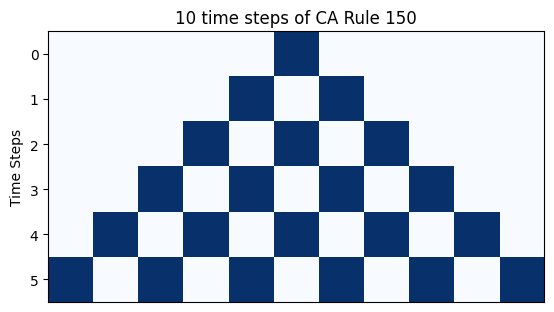

In [43]:
# Run a simulation of the CA with given rule -- copy-paste from above, with added rule parameter
def simulate_ca1(n_cells=11, n_steps=5, rule=rule_150):
    """ Run an `n_step` CA simulation starting with a single 1 in middle cell of a `width` sized vector  """
    ca_state = [0]*(n_cells//2) + [1, ] + [0]*(n_cells//2)
    ca_timesteps = [ca_state,]     # Define a "stack" of vectors to hold the CA state for each time step
    for t in range(n_steps):
        ca_state = ca_step1(ca_state, rule)
        ca_timesteps.append(ca_state)
    return ca_timesteps  # return an array of vectors - one CA state vector for each timestep

rule = (0,0,1,1,1,0,1,0)[::-1]
rule_lookup = {
    (0,0,0): 0,
    (0,0,1): 1,
}
plot_ca(simulate_ca1(rule=rule), title=f'{n_steps} time steps of CA Rule 150')

### Timing Tests
Test efficiency of `list` implementation as we scale up size of CA

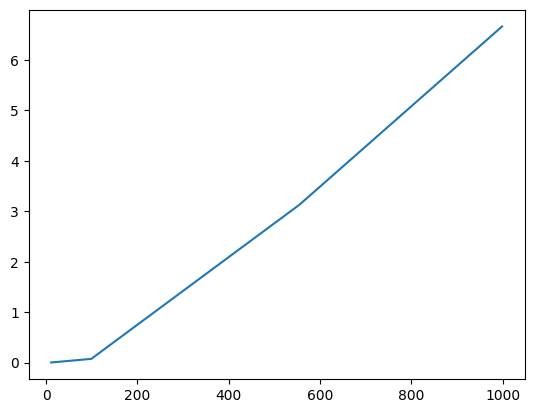

In [19]:
# CA "size" defines both the number of cells and time steps for the CA
ca_sizes = (11, 99, 555, 999,) # 1111, 1777, 2333, )

timings = [
    timeit(lambda: simulate_ca1(n_cells=size, n_steps=size),  number=3)
        for size in ca_sizes
]
plt.plot(ca_sizes, timings)

#### Question
Why is the performance of `simulate_ca1` so much worse than `ca_1D_simulation`?

## Efficient Representations for Elementary Cellular Automata

The problem we've encountered is that computing a CA is an $O(n^2)$ algorithm, and we are not being very efficient about each of those $n^2$ operations.
If you trace the logic for one run of `simulate_ca1`, you will find loops within loops within loops!  Python loops, especially when they involve array indexing, are known to be **slow**.
In addition, at the very core is `bin_to_dec1`, which does 3 exponentiation operations each time it is called!!! Worse yet, all those expensive operations compute the same thing every time.

This is a classic problem when we start working with large data sets and more complex algorithms - the naive way we learned to program in COMP115 breaks down.  One core method to improve performance is though "[vectorization](https://www.sciencedirect.com/science/article/abs/pii/S0021999111002026)".  If we can transform our algorithm to use vector operations instead of loops, then `Numpy` can perform them very efficiently.  This is the basis for all modern AI algorithms - they would simply be too slow without vectorization.  And this performance boost is enhanced even further when run on a [GPU](https://en.wikipedia.org/wiki/Graphics_processing_unit), a specialized processor for doing vector and matrix operations.

### numpy.array
`numpy.array` is an n-dimensional numeric grid with efficient vector and matrix operations built-in.
We can create an `array` of zeros by supplying a tuple with its dimensions, and it's data type (`dtype`):

In [20]:
rows = 5
cols = 11
array = np.zeros((rows, cols), dtype=np.uint8)
print(f'numpy.array has type: {type(array)} and dimensions {array.shape}')
array

numpy.array has type: <class 'numpy.ndarray'> and dimensions (5, 11)


array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=uint8)

### Binary to Decimal revisited
`bin_to_dec1` is computationally expensive because it computes n-1 exponentiation operations for each n-digit binary number.  This allows it to be very generic, but is wasteful for our case where we are always converting 3-digit numbers.

We can make a significant efficiency improvement simply by pre-calculating the powers-of-2.
This algorithm is less general because we need to know the max. number of digits.  But if we know, for example, we are always working 3-bit binary sequences, and we may do thousands of such computations, the performance improvement is worth the loss of generality.

In [21]:
POWERS_OF_2 = np.array( (2**2, 2**1, 2**0) )  # precompute, in "place" order

def bin_to_dec2(bin):
    """ convert 3-digit binary sequence to decimal using pre-computed powers-of-two """
    assert len(bin) == len(POWERS_OF_2)   # this is the price we pay - we are limited to 3 bit numbers
    return sum(bin[i] * POWERS_OF_2[i] for i in range(len(bin)))

assert bin_to_dec2((0,1,1)) == 3

### Dot-product algorithm
The `bin_to_dec2` algorithm sums the result of a vector multiplication:
$ decimal = \sum_{i=0}^{N-1} bit_i \cdot w_i $    where $ w_i $ repesents the $ i^{th} $ power of 2
That general algorithm is called **[dot product](https://en.wikipedia.org/wiki/Dot_product)**
([Khan Academy](https://duckduckgo.com/?q=vector+dot+product+site%3Akhanacademy.org) has some good tutorials if you want to learn more about this fundamental concept from Linear Algebra)

Let's factor out the dot-product algorithm so we can see what it looks like in general:

In [22]:
def dot_product1(a, w):
    """ return the dot product of vectors a and w, to length of w """
    return sum(a[i]*w[i] for i in range(len(w)))

assert dot_product1((0,1,1), (4,2,1)) == 3

def bin_to_dec3(bin):
    """ convert 3-digit binary sequence to decimal using dot-product with powers-of-two """
    assert len(bin) == len(POWERS_OF_2)
    return dot_product1(bin, POWERS_OF_2)

assert bin_to_dec3((0,1,1)) == 3

### Vector Multiplication with numpy.array
We can completely remove the loop at the heart of `dot_product` by *vectorizing* the operation...

`numpy.array` defines vector multiplication.
So, if we assume the input for `dot_product` is a `numpy.array`, the code can be written as a vector operation.  And based on that we can write our final, efficient version of `bin_to_dec`:

In [23]:
def dot_product(a, w):
    """ return the dot product of numpy.array a and vector w, to length of w """
    return np.sum(a * w)

assert dot_product(np.array((0,1,1)), (4,2,1)) == 3

def bin_to_dec(bin):
    """ convert 3-digit binary sequence to decimal using dot-product with powers-of-two """
    assert len(bin) == len(POWERS_OF_2)
    return dot_product(bin, POWERS_OF_2)

assert bin_to_dec((0,1,1)) == 3

### Sliding Dot Product
`dot_product` provides a vector solution for the `bin_to_dec` algorithm.  However, the `get_rule_indexes` algorithm still performs array indexing inside a loop.

Notice that this algorithm takes a vector as input and produces a vector of the same size as output.

We need a vector algorithm that will "slide" the `dot_product` algorithm along the vector, producing the output vector in a single operation.
This is called the ["sliding dot product" algorithm]() and is an example of a [sliding-window technique](https://www.geeksforgeeks.org/window-sliding-technique/).

Note: in continuous systems, like signal processing, the "sliding dot product" algorithm is called **[cross correlation](https://en.wikipedia.org/wiki/Cross-correlation)**
Thus, in `numpy` this operation is named **[correlate](https://numpy.org/doc/stable/reference/generated/numpy.correlate.html)**

 * Tip: we use `np.pad(array, n, mode='constant')` to pad array with `n` zeros on either end, or `mode='wrap'` to "wrap" the array ends.

In [24]:
def get_rule_indexes(state):
    """ Return vector of rule indexes - one index for each 3-cell neighbourhood in the CA state vector. """
    # numpy's version of the "sliding dot product" algorithm;
    # "pad" ends of state array with extra 0 cell to mitigate edge effects
    return np.correlate(np.pad(state, 1, mode='constant'), POWERS_OF_2, mode='valid')

assert all( get_rule_indexes(np.array([1,1,0,0,1,0,0,0])) == [3, 6, 4, 1, 2, 4, 0, 0] )

ca_state = np.array([1,1,0,0,1,0,0,0])
f'Indexes to choose next state for {ca_state} are: {get_rule_indexes(ca_state)}.'

'Indexes to choose next state for [1 1 0 0 1 0 0 0] are: [3 6 4 1 2 4 0 0].'

## Vector Indexing
Finally, we need to vectorize the `ca_step` algorithm, which also performs array indexing in a loop.

This algorithm needs to do the "lookup" in the `rule` vector to get the state transition for each cell.
`np.array` does "vector indexing", making it very easy to vectorize this algorithm too...

In [25]:
def ca_step(state, rule):
    """ Return the vector resulting from a transition of given CA state under the given 8-bit rule """
    indexes = get_rule_indexes(state)
    return rule[indexes]  # "vector indexing" replaces: [rule[i] for i in indexes]

rule_150 = np.array((1,0,0,1,0,1,1,0)[::-1])

ca_state = np.array((0,0,1,1,1,0,0,0,1,1,0))
f'By rule 110:  {ca_state} --> {ca_step(ca_state, rule_150)}'

'By rule 110:  [0 0 1 1 1 0 0 0 1 1 0] --> [0 1 0 1 0 1 0 1 0 0 1]'

## Exploring the Elementary CA Ruliad
 We now have the foundation to simulate ANY of Wolfram's elementary CA's efficiently, with any of the 256 rules defined as an 8-bit lookup table.
Last step is just to package this up in a re-usable function...

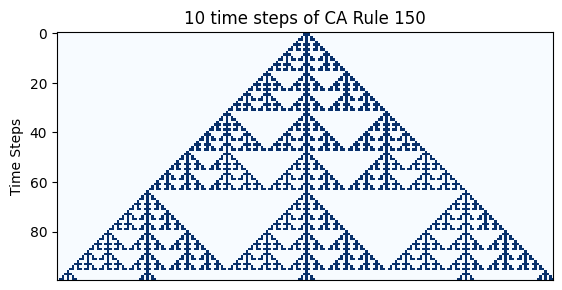

In [26]:
def simulate_ca(n_cells, n_steps, rule):
    """
    Generate "classic" Elementary CA with given number of cells,
    simulating progression of given rule for the given number of time steps.
    return a 2D array with CA state for 1 time step in each row.
    """
    array = np.zeros((n_steps, n_cells), dtype=np.uint8)  # an array of cells for each timestep
    array[0, n_cells//2] = 1                              # place a 1 in middle of initial state
    for t in range(1, n_steps):
        array[t] = ca_step(array[t-1], rule)
    return array

ca_timesteps = simulate_ca(200, 100, rule_150)
plot_ca(ca_timesteps, title=f'{n_steps} time steps of CA Rule 150')

### Timing Tests
Test efficiency of `np.array` implementation as we scale up size of CA

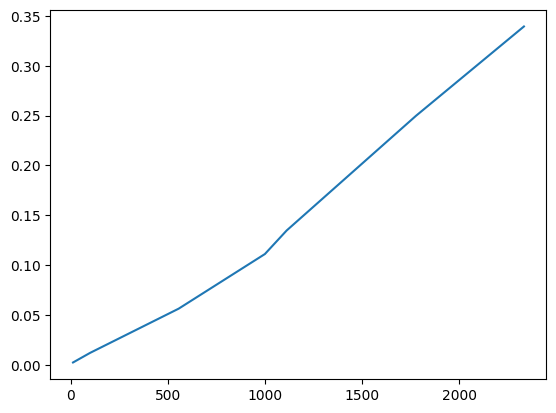

In [42]:
# CA "size" defines both the number of time steps and width of CA
ca_sizes = (11, 99, 555, 999, 1111, 1777, 2333,)

timings = [
    timeit(lambda: simulate_ca(n_cells=size, n_steps=size, rule=rule_150), number=3)
    for size in ca_sizes
]
plt.plot(ca_sizes, timings)

#### Question
By what factor did vectorizing the algorithm logic improve performance?